In [2]:
%pip install azure-ai-vision-imageanalysis
%pip install langchain 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import openai
import os
import requests

from dotenv import load_dotenv
from io import BytesIO
from langchain.prompts import PromptTemplate
from langchain import LLMChain
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import AzureOpenAI
from PIL import Image

In [4]:
load_dotenv()


True

In [5]:
import os
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

In [6]:
# Set the values of your computer vision endpoint and computer vision key
# as environment variables:
try:
    endpoint = os.environ["VISION_ENDPOINT"]
    key = os.environ["VISION_KEY"]
except KeyError:
    print("Missing environment variable 'VISION_ENDPOINT' or 'VISION_KEY'")
    print("Set them before running this sample.")
    exit()

# Create an Image Analysis client for synchronous operations
client = ImageAnalysisClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [7]:
# Get a caption for the image. This will be a synchronously (blocking) call.
result = client.analyze_from_url(
    image_url="https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png",
    visual_features=[VisualFeatures.CAPTION, VisualFeatures.READ],
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Image analysis results:")
# Print caption results to the console
print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results to the console
print(" Read:")
if result.read is not None:
    for line in result.read.blocks[0].lines:
        print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
        for word in line.words:
            print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")


Image analysis results:
 Caption:
   'a person pointing at a screen', Confidence 0.7768
 Read:
   Line: '9:35 AM', Bounding box [{'x': 131, 'y': 130}, {'x': 214, 'y': 130}, {'x': 214, 'y': 148}, {'x': 131, 'y': 148}]
     Word: '9:35', Bounding polygon [{'x': 132, 'y': 130}, {'x': 172, 'y': 131}, {'x': 171, 'y': 149}, {'x': 131, 'y': 148}], Confidence 0.9770
     Word: 'AM', Bounding polygon [{'x': 180, 'y': 131}, {'x': 203, 'y': 131}, {'x': 202, 'y': 149}, {'x': 180, 'y': 149}], Confidence 0.9980
   Line: 'Conference room 154584354', Bounding box [{'x': 132, 'y': 153}, {'x': 224, 'y': 153}, {'x': 224, 'y': 161}, {'x': 132, 'y': 160}]
     Word: 'Conference', Bounding polygon [{'x': 143, 'y': 153}, {'x': 174, 'y': 154}, {'x': 174, 'y': 161}, {'x': 143, 'y': 161}], Confidence 0.6930
     Word: 'room', Bounding polygon [{'x': 176, 'y': 154}, {'x': 188, 'y': 154}, {'x': 188, 'y': 161}, {'x': 176, 'y': 161}], Confidence 0.9590
     Word: '154584354', Bounding polygon [{'x': 192, 'y': 154},

Image analysis results:
 Caption:
   'a person pointing at a screen', Confidence 0.7768
 Read:
DENSE
<bound method _MyMutableMapping.values of {'values': [{'text': 'a person pointing at a screen', 'confidence': 0.7767987847328186, 'boundingBox': {'x': 0, 'y': 0, 'w': 1038, 'h': 692}}, {'text': 'a screen shot of a computer', 'confidence': 0.7600216269493103, 'boundingBox': {'x': 62, 'y': 51, 'w': 673, 'h': 437}}, {'text': 'a person pointing at a screen', 'confidence': 0.7735027074813843, 'boundingBox': {'x': 646, 'y': 63, 'w': 269, 'h': 605}}, {'text': 'a close up of a table', 'confidence': 0.7479931712150574, 'boundingBox': {'x': 0, 'y': 536, 'w': 1021, 'h': 146}}, {'text': "a close up of a person's head", 'confidence': 0.8116378784179688, 'boundingBox': {'x': 782, 'y': 77, 'w': 116, 'h': 103}}, {'text': "a person's back pocket", 'confidence': 0.7274041771888733, 'boundingBox': {'x': 753, 'y': 538, 'w': 140, 'h': 135}}, {'text': 'a close up of a plant', 'confidence': 0.7625939846038818

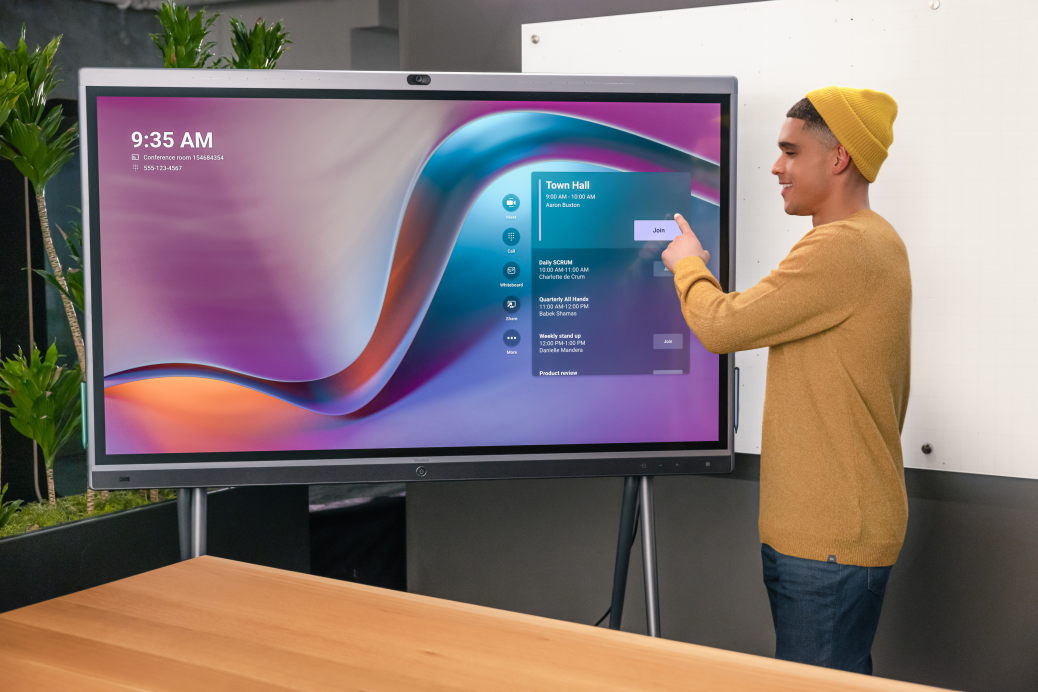

In [9]:
# Get a caption for the image. This will be a synchronously (blocking) call.

URL = "https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png"
 

result = client.analyze_from_url(
    image_url=URL,
    visual_features=[VisualFeatures.CAPTION, 
                    VisualFeatures.READ,
                    VisualFeatures.SMART_CROPS,
                    VisualFeatures.DENSE_CAPTIONS,
                    VisualFeatures.OBJECTS,
                    VisualFeatures.PEOPLE,
                    VisualFeatures.TAGS
                    ],
                    model_version="latest",
                    language="en",
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Image analysis results:")
# Print caption results to the console
print(" Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

# Print text (OCR) analysis results to the console
print(" Read:")
# if result.read is not None:
#     for line in result.read.blocks[0].lines:
#         print(f"   Line: '{line.text}', Bounding box {line.bounding_polygon}")
#         for word in line.words:
#             print(f"     Word: '{word.text}', Bounding polygon {word.bounding_polygon}, Confidence {word.confidence:.4f}")

from pprint import pprint 

print ("DENSE")
pprint(result.dense_captions.values)

print ("TAGS")
pprint(result.tags.items)
  
print ("CROPS")
pprint(result.smart_crops.items)

print ("PEOPLE")
pprint(result.people.items)

print("Objects")
pprint(result.objects.items)


response = requests.get(URL)
image_data = BytesIO(response.content)
img = Image.open(image_data)
img